## Basic Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

In [2]:
raw_data = pd.read_csv('../../resources/udemy/clustering/3.01.+Country+clusters.csv')
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


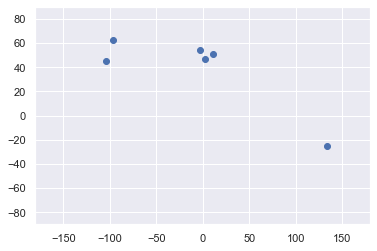

In [3]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [4]:
#x = raw_data.iloc[:,1:3]
x = raw_data[['Latitude', 'Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
km = KMeans(2)

In [6]:
km.fit(x)

KMeans(n_clusters=2)

In [7]:
identified_cluster = km.fit_predict(x)
identified_cluster

array([1, 1, 1, 1, 1, 0], dtype=int32)

In [8]:
data = raw_data.copy()
data['Clusters'] = identified_cluster
data

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


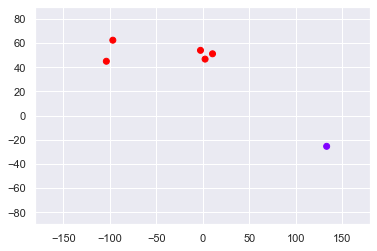

In [9]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Selecting number of cluster

#### WCSS

In [10]:
km.inertia_

13205.758119999997

In [11]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [12]:
wcss

[42601.91356666667,
 13205.758119999997,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### Elbow Method

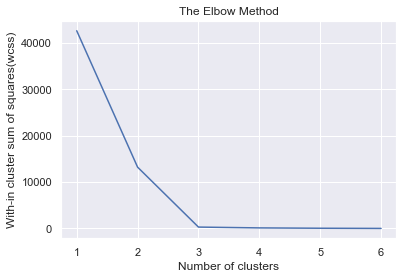

In [13]:
number_of_clusters = range(1, 7)
plt.plot(number_of_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('With-in cluster sum of squares(wcss)')
plt.show()